<a href="https://colab.research.google.com/github/carabiasjulio/fyea/blob/main/FyEA_Lab2_SpatialAudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 2: Procesado de Audio Espacial**

***Introducción***

El procesado de audio espacial engloba una gran variedad de aplicaciones que tienen como objetivo situar en el espacio la percepción del oyente con respecto a una fuente sonora. Este tipo de aplicaciones depende en gran medida del número de altavoces presente en una sala o bien del uso de auriculares. En esta práctica se va a tratar las técnicas de audio estéreo y auralización cuando el oyente dispone de auriculares para la audición.

El panorama (panning) es la propagación de una señal de sonido a través de varios altavoces para crear la impresión de que la fuente de sonido está en un lugar donde no hay altavoces presentes. En esta sesión, practicaremos el panorama con la forma más básicas de audio multicanal: estéreo de dos canales (el estándar para CD de audio, radio FM y la mayoría de los canales de TV). El estéreo de dos canales (o estéreo 2.0, o simplemente estéreo) tiene dos canales frontales, izquierdo (L) y derecho (R), idealmente ubicado a ± 30o. En un archivo de audio estéreo 2.0, los canales están en el orden L-R.

La Auralización u Holofonía consiste en la modificación y procesado del sonido de una fuente sonora para que adopte las características acústicas de una trayectoria y espacio determinados con el fin de virtualizar y ofrecer una percepción espacial del movimiento de la fuente sonora.

En la espacialización, o simulación espacial (en 3D) mediante auralización, se pretende recrear la imagen acústica del sonido ubicando artificialmente la fuente en el lugar deseado del espacio. Para conseguir este objetivo se utiliza la respuesta estimada del oído izquierdo y derecho desde distintos ángulos de azimut y elevación, es decir, tomando diferentes posiciones y elevaciones. Para calcular la respuesta al impulso de cada oído se pueden utilizar oyentes de referencia o bien cabezas de plástico (“dummy head”) que sirven para estimar la respuesta al impulso en todas las direcciones del espacio. Es necesario realizar estas grabaciones en una sala anecoica.

El alumnado deberá manejar las siguientes tareas al finalizar esta práctica:
* Conocer los mecanismos de localización basados en diferencia de tiempo/amplitud entre canales.
* Conocer las variaciones en tiempo y frecuencia de las funciones de transferencia de la cabeza (Head-Related Transfer Function, HRTF).
* Realizar el filtrado de un sonido respecto a un azimut y elevación para ubicar este sonido en una determinada posición espacial.


# Parte 1: Sonido Stereo

En esta tarea se utilizarán las técnicas de diferencia de nivel y diferencia de amplitud entre canales para construir la imagen estéreo 2.0.

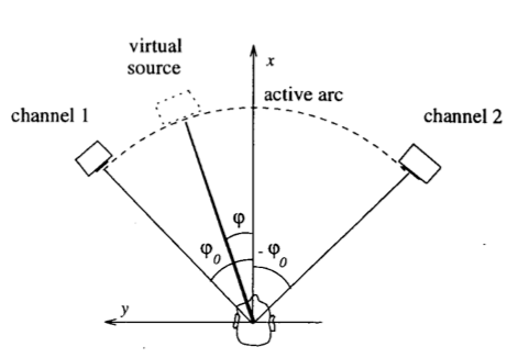

a) Diferencia de tiempo entre canales:

A partir de la siguiente gráfica donde se determina el retardo necesario entre canales para generar una imagen estéreo:

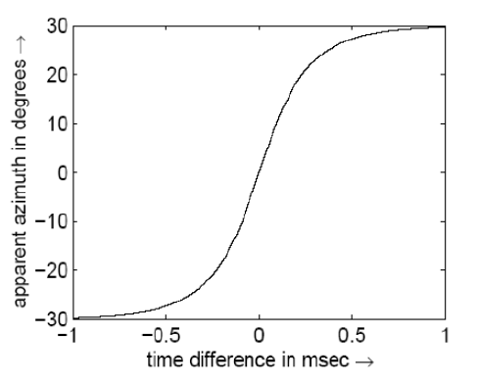

Implemente un código para construir una señal estéreo variando la posición de la fuente entre las siguientes posiciones.

* 0º (centro)
* 10º derecha
* 20º derecha
* 30º derecha (justo el altavoz derecho)

Nota: Use la señal “mono.wav” como base y replíquela tantas veces como posiciones.

Sample rate: 48000 Hz
Total time: 4.8725625 s


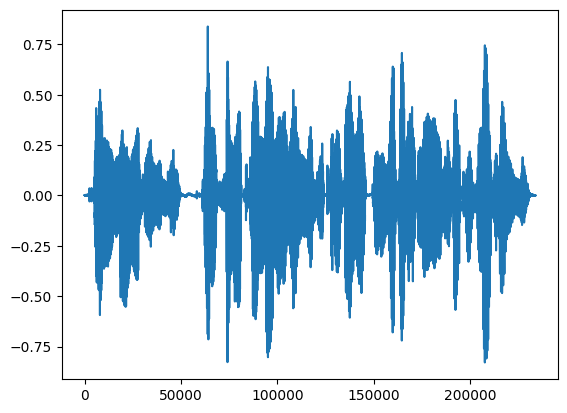

In [6]:
# Needed imports
import numpy as np
from IPython.display import Audio
import soundfile as sf
from matplotlib import pyplot as plt

# Load the file on an object
sounddata, framerate = sf.read('signals/mono.wav')

# Separete the object elements
time      = np.arange(0,len(sounddata))/framerate

# Show information about the object
print('Sample rate:',framerate,'Hz')
print('Total time:',len(sounddata)/framerate,'s')

plt.plot(sounddata)
plt.show()

# Generate a player for mono sound
Audio(sounddata,rate=framerate)

In [ ]:
# Your code here



b)	Diferencia de nivel (amplitud) entre canales:

A partir de la señal (mono.wav), aplique la ley de Blumlein para determinar la diferencia de nivel necesaria y genere la misma imagen que en el ejemplo anterior.


In [10]:
def blumlein(signal, angle):
  """Applies the Blumlein stereo recording technique to a signal.

  Args:
    signal: The input signal.
    angle: The angle of the sound source in degrees, where 0 degrees is
           directly in front of the listener.

  Returns:
    A tuple containing the left and right channel signals.
  """
  # Convert angle to radians.
  angle_rad = np.deg2rad(angle)

  # Calculate the left and right channel signals.
  left_channel = signal * (np.cos(angle_rad) + np.sin(angle_rad)) / np.sqrt(2)
  right_channel = signal * (np.cos(angle_rad) - np.sin(angle_rad)) / np.sqrt(2)

  return left_channel, right_channel

In [16]:
# Your code here!



Comente sus impresiones sobre la localización y compare el resultado obtenido usando las técnicas de diferencia de tiempo y amplitud entre canales.

> Write here!



c)	Ejemplo de mezcla:

Usando la técnica de diferencia de amplitud entre canales, DEFINA y GENERE una imagen estéreo con las señales “drums.wav”, ‘’guitar.wav” y “vocals.wav”.


In [ ]:
# Your code here



# **PARTE 2: SONIDO BINAURAL**

Con esta tarea se conocer el procesado de señales sonoras para la espacialización de fuentes sonoras con auriculares. Después de una breve descripción por parte del profesor, se deberá revisar la teoría de filtrado con filtros FIR tanto en frecuencia como en tiempo y realizar las siguientes tareas:

Descargue la base de datos CIPIC HRTF de la dirección web

https://ucdavis.app.box.com/s/wrxylwv65q4ll69xri89pduhd4w4coqr

En esta tarea seleccionaremos las grabaciones correspondientes al sujeto 019:

standard_hrir_database $\rightarrow$ subject_019 $\rightarrow$ hrir_final.mat

La estructura de las hrir se encuentra definida en la documentación:

doc $\rightarrow$ hrir_data_documentation.pdf





In [8]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import IPython.display as ipd
from matplotlib import pyplot as plt
import numpy as np

from scipy.io import loadmat
# CIPIC database: https://www.ece.ucdavis.edu/cipic/
# hrir_final.mat taken from https://github.com/marekjg/hrtf/tree/master/cipic_hrir
cipic = loadmat('hrir/hrir_final.mat')

# Read Audio file
y_clip, fs = sf.read('signals/mono.wav')

##------
def filter(az = 0, el = 0):
  firL = cipic['hrir_l'][az][el]
  firR = cipic['hrir_r'][az][el]

  outL = np.convolve(y_clip, firL)
  outR = np.convolve(y_clip, firR)
  out = np.stack([outL, outR], axis=0)

  ipd.display(ipd.Audio(data=out, rate=fs, autoplay=True))
##------

# Create the sliders
az_slider = widgets.IntSlider(
    value=5,
    min=0,
    max=len(cipic['hrir_l'])-1,
)

el_slider = widgets.IntSlider(
    value=40,
    min = 0,
    max = len(cipic['hrir_l'][0])-1,
    orientation = 'vertical'
)

interact(filter,
         az=az_slider, #(0, len(cipic['hrir_l']-1)),
         el=el_slider, #(0, len(cipic['hrir_l'][0]-1)),
         continuous_update=False,
)

interactive(children=(IntSlider(value=5, description='az', max=24), IntSlider(value=40, description='el', max=…

<function __main__.filter(az=0, el=0)>

a)	Seleccione las hrir correspondientes para:
-	Azimuth $0^o$, elevation $0^o$
-	Azimuth $30^o$, elevation $0^o$
-	Azimuth $55^o$, elevation $0^o$
-	Azimuth $85^o$, elevation $0^o$

Genere un script que calcule la diferencia de tiempo interaural (ITD) para cada caso. Sugerencia: como primera aproximación, el ITD se puede calcular como la diferencia de tiempo entre los máximos de los dos canales.


In [9]:
# Your code here!



Genere un script que calcule la diferencia de nivel interaural (ILD) para cada caso. Sugerencia: el ILD se puede calcular como la diferencia en el valor RMS de los dos HRIR (expresado en dB).

In [ ]:
# Your code here



Comente la utilidad de ITD y ILD para la localización del sonido:

***Write here!***

b)	Seleccione las hrir correspondientes para:
-	Azimuth $0^o$, elevation $0^o$
-	Azimuth $0^o$, elevation $45^o$
-	Azimuth $0^o$, elevation $90^o$
-	Azimuth $180^o$, elevation $0^o$
-	Azimuth $180^o$, elevation $-45^o$


Compruebe que las ITD y las ILD son prácticamente $0$ en cada caso. Explique porque sucede esto:


In [ ]:
# Your code here



Calcule la transformada de las HRIRs para cada caso (i.e HRTF). Dibuje cada par de transformadas (izquierda/derecha) para cada ejemplo, en dB. ¿Observa diferencias entre HRTF para las diferentes localizaciones? Nota: Pinte abajo los diferentes plots obtenidos junto a la explicación.

In [ ]:
# Your code here!



c)	Haciendo el uso de la función “filter” obtenga para un sonido, y ángulo de azimut y elevación, el filtrado del canal izquierdo y derecho. Use la función “audioread” para leer el fichero de sonido y la función “audiowrite” para guardar el resultado (binaural_mixture.wav).
NOTA: Compruebe el mismo ejemplo de la mezcla de la Parte 1: Tarea C. Si no dispone de los mismos ángulos use una aproximación. Compare el resultado obtenido:


In [ ]:
# Your code here!



d)	Proponga una configuración de mezcla binaural alternativa incluyendo valores de azimuth y elevación para las tres fuentes aportadas (drums, guitar y vocals). Guarde el resultado como (alternative_binaural_mixture.wav).


In [ ]:
# Your code here!



**EVALUACIÓN**

Se comprobará en el laboratorio por parte del profesor (y será objeto de evaluación)
* Interpretación de las ITD y ILD para la localización de fuentes en señales estéreo.
* Interpretación en tiempo y frecuencia de las respuestas al impulso de la cabeza (HRTF).
* Realización del filtrado FIR de una señal en el tiempo y en la frecuencia con MATLAB.


**TEMPORIZACIÓN**

Para la realización de esta práctica el alumno dispondrá de dos sesiones de laboratorio de dos horas de duración cada una de ellas.
